# Final Project - DSCI 614 Text Mining
### Jeffery Boczkaja

## 1. Concatenate the Location, TweetAt, and OriginalTweet columns into a new column of Tweet_texts.

In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
train_df= pd.read_csv('Corona_NLP_train.csv', encoding='ISO-8859-1')
train_df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


In [3]:
test_df= pd.read_csv('Corona_NLP_test.csv', encoding='ISO-8859-1')
test_df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
5,6,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a...,Neutral
6,7,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
7,8,44960,"Geneva, Switzerland",03-03-2020,"@DrTedros ""We canÂt stop #COVID19 without pro...",Neutral
8,9,44961,NaN,04-03-2020,HI TWITTER! I am a pharmacist. I sell hand san...,Extremely Negative
9,10,44962,"Dublin, Ireland",04-03-2020,Anyone been in a supermarket over the last few...,Extremely Positive


In [4]:
test_df['Tweet_texts'] = test_df['Location'].astype(str) + ' ' + test_df['TweetAt'] + ' ' + test_df['OriginalTweet']
print(test_df.head())

   UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  NaN  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   

                                       OriginalTweet           Sentiment  \
0  TRENDING: New Yorkers encounter empty supermar...  Extremely Negative   
1  When I couldn't find hand sanitizer at Fred Me...            Positive   
2  Find out how you can protect yourself and love...  Extremely Positive   
3  #Panic buying hits #NewYork City as anxious sh...            Negative   
4  #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral   

                                         Tweet_texts  
0  NYC 02-03-2020 TRENDING: New Yorkers encounter...  
1  Seattle, WA 02-03-2020 When I couldn't find ha...  
2  nan 02-03-2020

In [5]:
train_df['Tweet_texts'] = train_df['Location'].astype(str) + ' ' + train_df['TweetAt'] + ' ' + train_df['OriginalTweet']
print(train_df.head())

   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral   
1  advice Talk to your neighbours family to excha...            Positive   
2  Coronavirus Australia: Woolworths to give elde...            Positive   
3  My food stock is not the only one which is emp...            Positive   
4  Me, ready to go at supermarket during the #COV...  Extremely Negative   

                                         Tweet_texts  
0  London 16-03-2020 @MeNyrbie @Phil_Gahan @Chris...  
1  UK 16-03-2020 advice Talk to your neighbours f...  
2  Vagabonds 16-03-2020 Coronavirus Australia: Wo...  
3  nan 16-03-2020 My f

## 2. Clean and preprocess the new column of Tweet_texts.

In [6]:
percent_missing = test_df.isnull().sum() * 100 / len(test_df)
percent_missing

UserName          0.000000
ScreenName        0.000000
Location         21.958926
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
Tweet_texts       0.000000
dtype: float64

In [7]:
percent_missing = train_df.isnull().sum() * 100 / len(train_df)
percent_missing

UserName          0.000000
ScreenName        0.000000
Location         20.871298
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
Tweet_texts       0.000000
dtype: float64

### 2.1-2.7
- 2.1 Remove all special characters, punctuation using a regular expression.
- 2.2 Remove the date and time in the tweets using a regular expression.
- 2.3 Remove the hyperlink URL in the tweets using a regular expression.
- 2.4 Remove the Twitter hashtags(# before a relevant keyword or phrase ) in the tweets using a regular expression.
- 2.5 Remove the usernames (also known as the handle –– begins with the “@” symbol) using a regular expression.
- 2.6 Remove all words containing at most two characters such as "a", "an", "in", "on", etc.
- 2.7 Remove all rows without any text left (empty text) in the column of Tweet_texts.

In [8]:
import re
def clean_tweets(tweet):
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    tweet = re.sub(r'\b\d+\S*\s*', '', tweet)
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet)
    tweet = re.sub(r'#\S+', '', tweet)
    tweet = re.sub(r'@\S+', '', tweet)
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    tweet = re.sub(r'\s+', ' ', tweet).strip()

    return tweet

test_df['Tweet_texts'] = test_df['Location'].astype(str) + ' ' + test_df['TweetAt'] + ' ' + test_df['OriginalTweet']
train_df['Tweet_texts'] = train_df['Location'].astype(str) + ' ' + train_df['TweetAt'] + ' ' + train_df['OriginalTweet']

test_df['Tweet_texts'] = test_df['Tweet_texts'].apply(clean_tweets)
train_df['Tweet_texts'] = train_df['Tweet_texts'].apply(clean_tweets)

print(test_df.head())
print(train_df.head())

   UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  NaN  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   

                                       OriginalTweet           Sentiment  \
0  TRENDING: New Yorkers encounter empty supermar...  Extremely Negative   
1  When I couldn't find hand sanitizer at Fred Me...            Positive   
2  Find out how you can protect yourself and love...  Extremely Positive   
3  #Panic buying hits #NewYork City as anxious sh...            Negative   
4  #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral   

                                         Tweet_texts  
0  NYC TRENDING New Yorkers encounter empty super...  
1  Seattle When couldnt find hand sanitizer Fred ...  
2  nan Find out h

### 2.8 Perform the part of speech tagging for the texts.

In [9]:
import spacy

nlp = spacy.load("en_core_web_sm")

sample_text = test_df.iloc[0]['Tweet_texts']

doc = nlp(sample_text)

for token in doc:
    print(token.text, token.pos_)

NYC PROPN
TRENDING VERB
New PROPN
Yorkers PROPN
encounter VERB
empty ADJ
supermarket NOUN
shelves NOUN
pictured VERB
Wegmans PROPN
Brooklyn PROPN
soldout VERB
online ADJ
grocers NOUN
FoodKick PROPN
MaxDelivery PROPN
coronavirusfearing NOUN
shoppers NOUN
stock NOUN


### 2.9 Visualize the dependency parser.

In [10]:
from spacy import displacy
nlp = spacy.load("en_core_web_sm")
displacy.render(doc, style="dep", jupyter=True)

### 2.10 Perform the named entities recognition for the texts.

In [11]:
for ent in doc.ents:
    print(ent.text, ent.label_)

NYC TRENDING ORG
New Yorkers NORP
Wegmans NORP
Brooklyn GPE
FoodKick MaxDelivery PRODUCT


### 2.11 Visualize the GEOLOCATION, MONEY, and QUANTITY in the texts.

In [12]:
gpe = len([ent for ent in doc.ents if ent.label_=='GPE'])
money = len([ent for ent in doc.ents if ent.label_=='MONEY'])
quantity = len([ent for ent in doc.ents if ent.label_=='QUANTITY'])
print(f'Times Money appears:    {gpe}')
print(f'Times Money appears:    {money}')
print(f'Times Quantity appears: {quantity}')

filtered_ents = [ent for ent in doc.ents if ent.label_ in ["GPE", "MONEY", "QUANTITY"]]
displacy.render(filtered_ents, style="ent", jupyter=True)

Times Money appears:    1
Times Money appears:    0
Times Quantity appears: 0


## 3. Extract all the tokens from the Tweet_texts.

In [13]:
nlp = spacy.load("en_core_web_sm")

def tokenize_text(text):
    doc = nlp(text)
    tokens = [token.text for token in doc]
    return tokens

test_df['tokens'] = test_df['Tweet_texts'].apply(tokenize_text)
train_df['tokens'] = train_df['Tweet_texts'].apply(tokenize_text)

print(test_df[['Tweet_texts', 'tokens']].head())
print(train_df[['Tweet_texts', 'tokens']].head())

                                         Tweet_texts  \
0  NYC TRENDING New Yorkers encounter empty super...   
1  Seattle When couldnt find hand sanitizer Fred ...   
2  nan Find out how you can protect yourself and ...   
3  Chicagoland Panic buying hits NewYork City anx...   
4  Melbourne Victoria toiletpaper dunnypaper coro...   

                                              tokens  
0  [NYC, TRENDING, New, Yorkers, encounter, empty...  
1  [Seattle, When, could, nt, find, hand, sanitiz...  
2  [nan, Find, out, how, you, can, protect, yours...  
3  [Chicagoland, Panic, buying, hits, NewYork, Ci...  
4  [Melbourne, Victoria, toiletpaper, dunnypaper,...  
                                         Tweet_texts  \
0         London MeNyrbie PhilGahan Chrisitv and and   
1  advice Talk your neighbours family exchange ph...   
2  Vagabonds Coronavirus Australia Woolworths giv...   
3  nan food stock not the only one which empty PL...   
4  nan ready supermarket during the COVID19 outbr... 

## 4. Replace the Tweet_texts column with the string only containing the lemmas of all the tokens.

In [14]:
def lemmatize_text(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    return ' '.join(lemmas)

test_df['Tweet_texts'] = test_df['Tweet_texts'].apply(lemmatize_text)
train_df['Tweet_texts'] = train_df['Tweet_texts'].apply(lemmatize_text)

print(test_df[['Tweet_texts']].head())
print(train_df[['Tweet_texts']].head())

                                         Tweet_texts
0  NYC trend New Yorkers encounter empty supermar...
1  Seattle when could not find hand sanitizer Fre...
2  nan find out how you can protect yourself and ...
3  Chicagoland Panic buying hit NewYork City anxi...
4  Melbourne Victoria toiletpaper dunnypaper coro...
                                         Tweet_texts
0         London MeNyrbie PhilGahan Chrisitv and and
1  advice talk your neighbour family exchange pho...
2  Vagabonds Coronavirus Australia Woolworths giv...
3  nan food stock not the only one which empty pl...
4  nan ready supermarket during the covid19 outbr...


## 5. Graphically summarize the Sentiment.

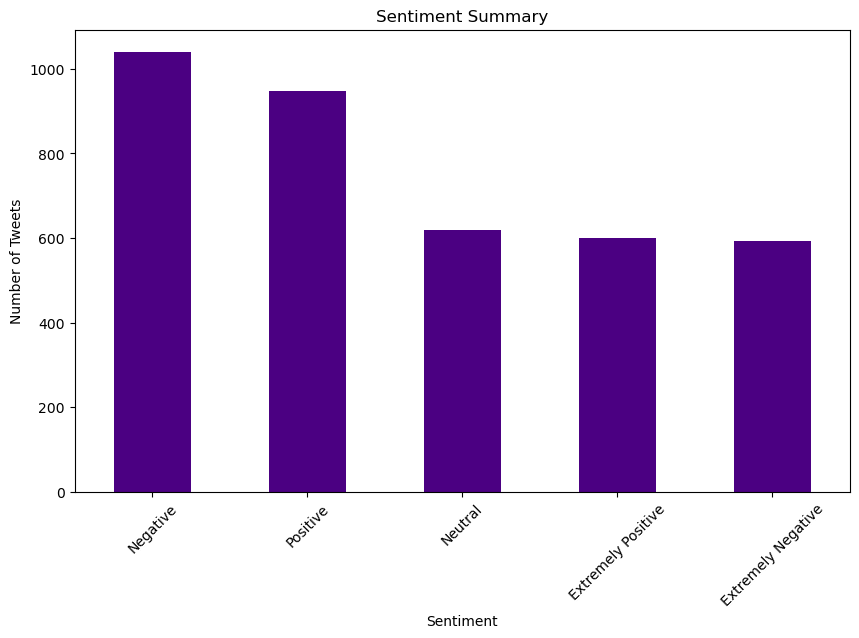

In [15]:
import matplotlib.pyplot as plt

sentiment_counts = test_df['Sentiment'].value_counts()

plt.figure(figsize=(10,6))
sentiment_counts.plot(kind='bar', color='indigo')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Summary')
plt.xticks(rotation=45)
plt.show()

## 6. Graphically summarize the length of the text of the Tweet_texts using boxplot, histogram, and density plot.

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

test_df['text_length'] = test_df['Tweet_texts'].apply(len)
train_df['text_length'] = train_df['Tweet_texts'].apply(len)

### Test Boxplot

C:\Users\whitl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


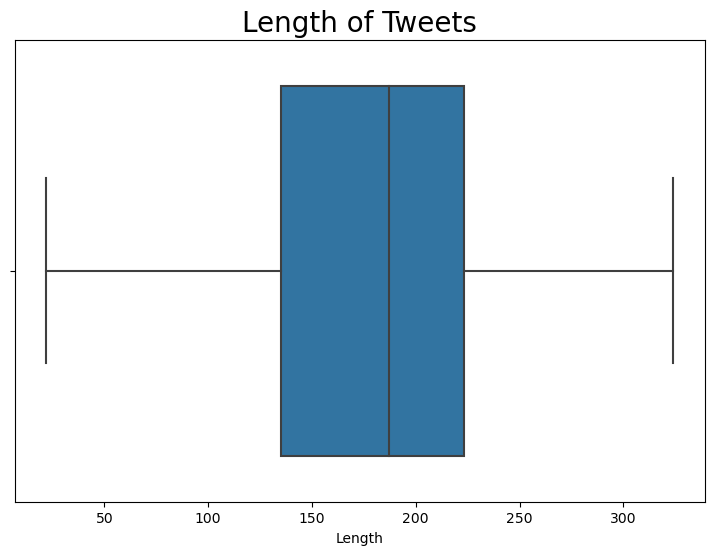

In [17]:
plt.figure(figsize=(8.9, 6))
sns.boxplot(x=test_df['text_length'])
plt.title("Length of Tweets", fontsize=20)
plt.xlabel("Length")
plt.show()

### Test Histogram

C:\Users\whitl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\whitl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


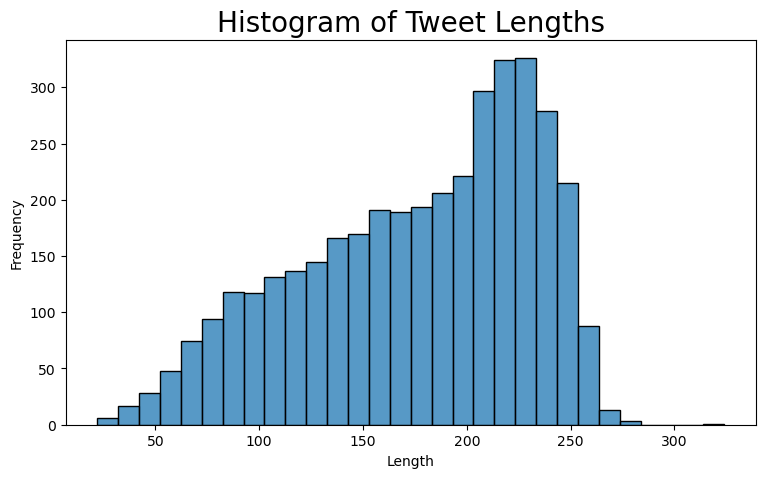

In [18]:
plt.figure(figsize=(8.9, 5))
sns.histplot(test_df['text_length'], bins=30, kde=False)
plt.title("Histogram of Tweet Lengths", fontsize=20)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

### Test Density Plot

C:\Users\whitl\AppData\Local\Temp\ipykernel_25444\1368697008.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_df['text_length'], shade=True)
C:\Users\whitl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\whitl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


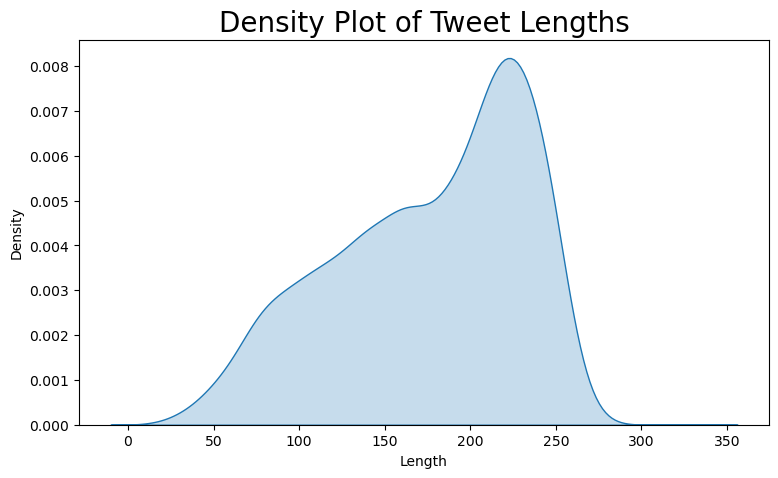

In [19]:
plt.figure(figsize=(8.9, 5))
sns.kdeplot(test_df['text_length'], shade=True)
plt.title("Density Plot of Tweet Lengths", fontsize=20)
plt.xlabel("Length")
plt.ylabel("Density")
plt.show()

### Train Boxplot

C:\Users\whitl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


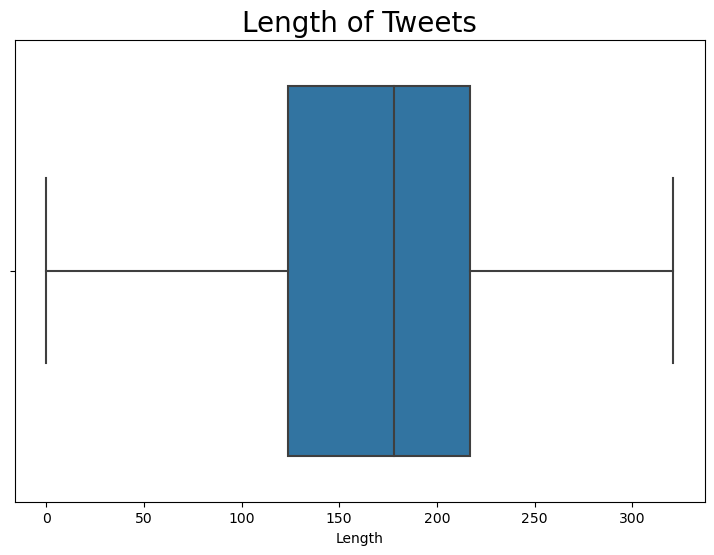

In [20]:
# Boxplot
plt.figure(figsize=(8.9, 6))
sns.boxplot(x=train_df['text_length'])
plt.title("Length of Tweets", fontsize=20)
plt.xlabel("Length")
plt.show()

### Train Histogram

C:\Users\whitl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\whitl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


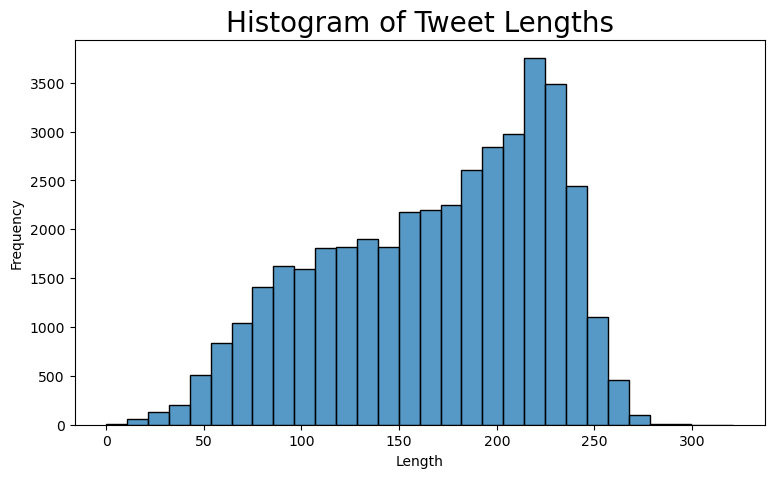

In [21]:
plt.figure(figsize=(8.9, 5))
sns.histplot(train_df['text_length'], bins=30, kde=False)
plt.title("Histogram of Tweet Lengths", fontsize=20)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

### Train Density

C:\Users\whitl\AppData\Local\Temp\ipykernel_25444\2386478238.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df['text_length'], shade=True)
C:\Users\whitl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\whitl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


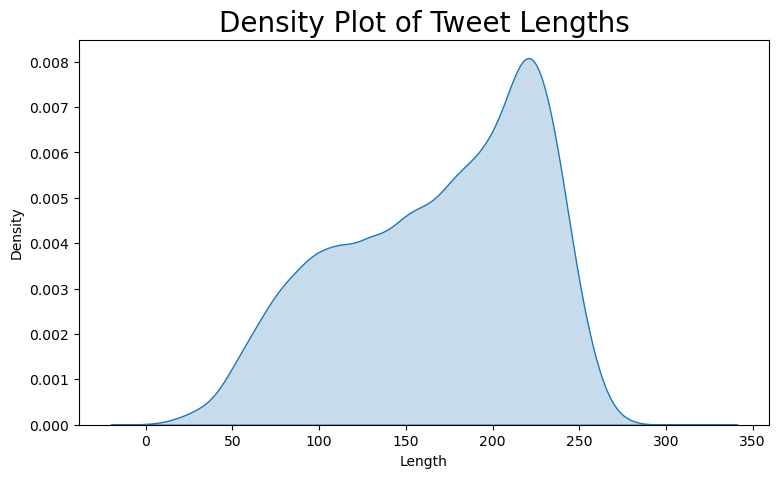

In [22]:
plt.figure(figsize=(8.9, 5))
sns.kdeplot(train_df['text_length'], shade=True)
plt.title("Density Plot of Tweet Lengths", fontsize=20)
plt.xlabel("Length")
plt.ylabel("Density")
plt.show()

## 7. Graphically summarize the word count of the text of the Tweet_texts using boxplot, histogram, and density plot.

In [23]:
test_df['word_count'] = test_df['Tweet_texts'].apply(lambda x: len(x.split()))
train_df['word_count'] = train_df['Tweet_texts'].apply(lambda x: len(x.split()))

### Test Boxplot

C:\Users\whitl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


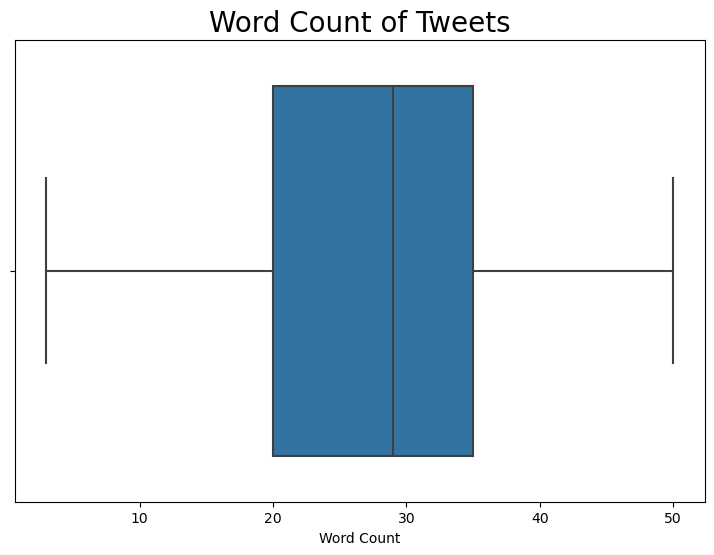

In [24]:
plt.figure(figsize=(8.9, 6))
sns.boxplot(x=test_df['word_count'])
plt.title("Word Count of Tweets", fontsize=20)
plt.xlabel("Word Count")
plt.show()

### Test Histogram

C:\Users\whitl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\whitl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


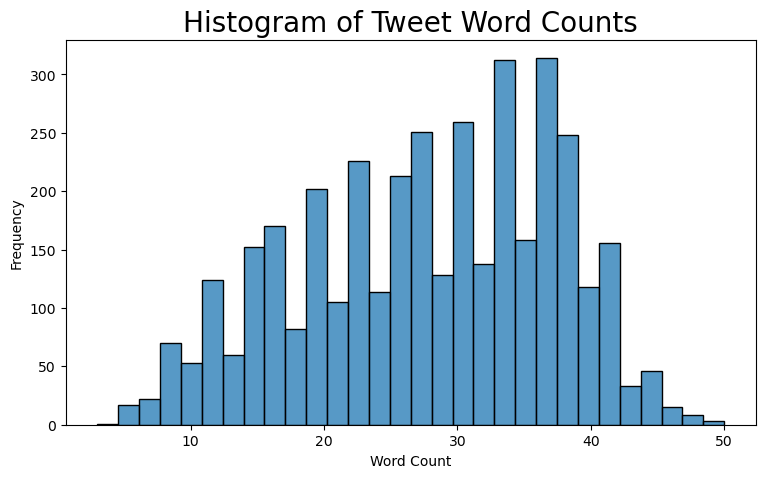

In [25]:
plt.figure(figsize=(8.9, 5))
sns.histplot(test_df['word_count'], bins=30, kde=False)
plt.title("Histogram of Tweet Word Counts", fontsize=20)
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

### Test Density Plot

C:\Users\whitl\AppData\Local\Temp\ipykernel_25444\708647041.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(test_df['word_count'], shade=True)
C:\Users\whitl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\whitl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


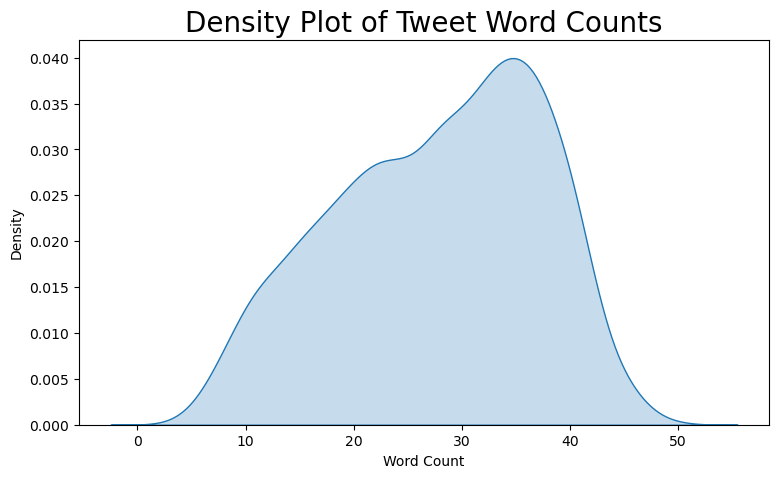

In [26]:
plt.figure(figsize=(8.9, 5))
sns.kdeplot(test_df['word_count'], shade=True)
plt.title("Density Plot of Tweet Word Counts", fontsize=20)
plt.xlabel("Word Count")
plt.ylabel("Density")
plt.show()

### Train Boxplot

C:\Users\whitl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


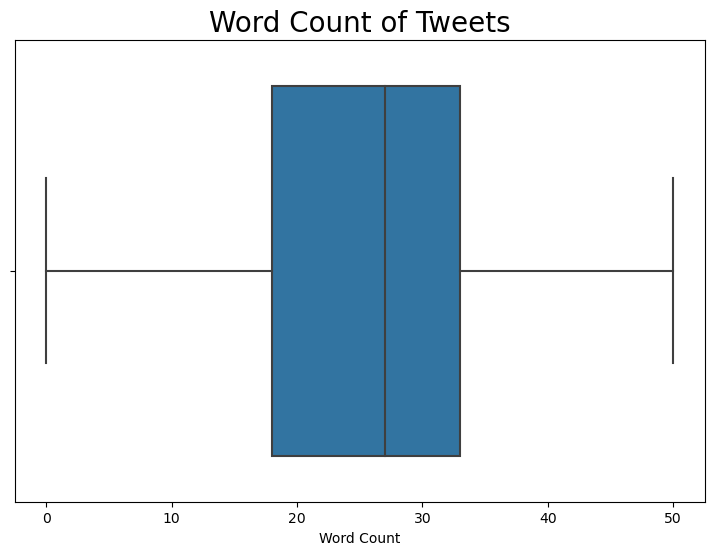

In [27]:
plt.figure(figsize=(8.9, 6))
sns.boxplot(x=train_df['word_count'])
plt.title("Word Count of Tweets", fontsize=20)
plt.xlabel("Word Count")
plt.show()

### Train Histogram

C:\Users\whitl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\whitl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


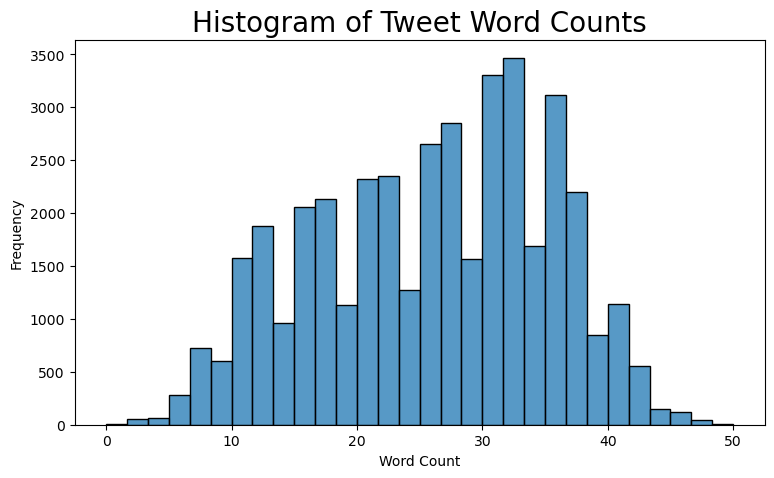

In [28]:
plt.figure(figsize=(8.9, 5))
sns.histplot(train_df['word_count'], bins=30, kde=False)
plt.title("Histogram of Tweet Word Counts", fontsize=20)
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

### Train Density Plot

C:\Users\whitl\AppData\Local\Temp\ipykernel_25444\1869993242.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df['word_count'], shade=True)
C:\Users\whitl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\whitl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


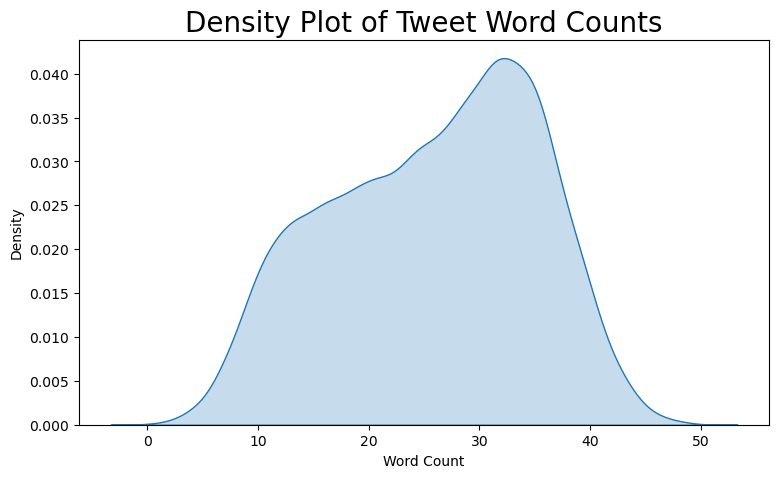

In [29]:
plt.figure(figsize=(8.9, 5))
sns.kdeplot(train_df['word_count'], shade=True)
plt.title("Density Plot of Tweet Word Counts", fontsize=20)
plt.xlabel("Word Count")
plt.ylabel("Density")
plt.show()

## 8. Graphically summarize the top 10 unigram and bigrams of the tf-idf of the text of the Tweet_texts.

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

all_text = pd.concat([test_df['Tweet_texts'], train_df['Tweet_texts']])
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
tfidf_matrix = vectorizer.fit_transform(all_text)
summed_weights = tfidf_matrix.sum(axis=0)
terms = vectorizer.get_feature_names_out()

weights_dict = {term: summed_weights[0, idx] for term, idx in zip(terms, range(len(terms)))}
weights_df = pd.DataFrame(list(weights_dict.items()), columns=['Term', 'Weight'])

top_10_unigrams = weights_df[weights_df['Term'].str.count(' ') == 0].nlargest(10, 'Weight')
top_10_bigrams = weights_df[weights_df['Term'].str.count(' ') == 1].nlargest(10, 'Weight')

### Top 10 Unigrams 

C:\Users\whitl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\whitl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\whitl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


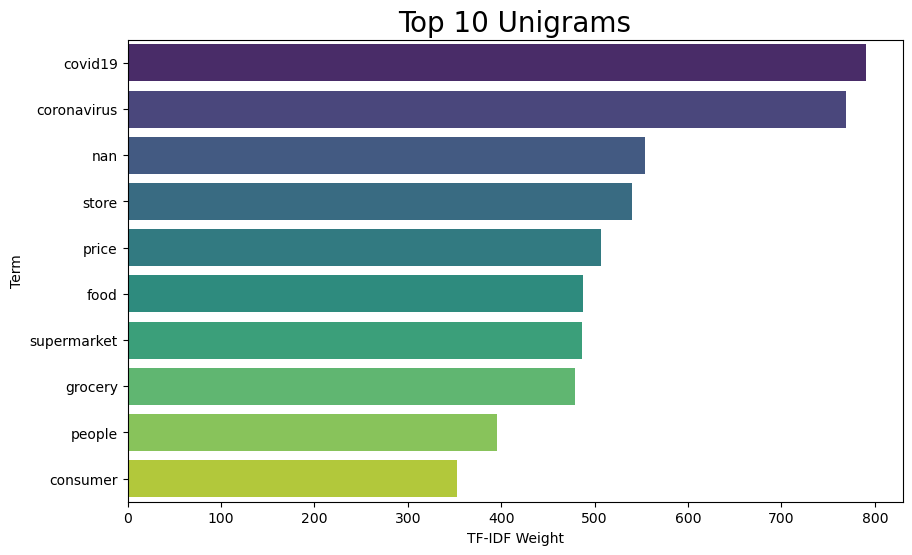

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Weight', y='Term', data=top_10_unigrams, palette='viridis')
plt.title('Top 10 Unigrams', fontsize=20)
plt.xlabel('TF-IDF Weight')
plt.show()

### Top 10 Bigrams

C:\Users\whitl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\whitl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\whitl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


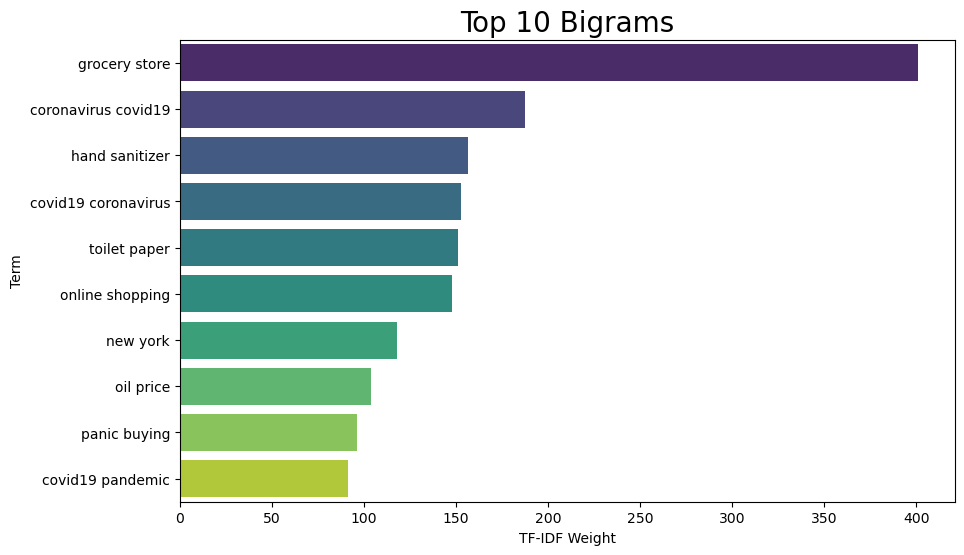

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Weight', y='Term', data=top_10_bigrams, palette='viridis')
plt.title('Top 10 Bigrams', fontsize=20)
plt.xlabel('TF-IDF Weight')
plt.show()

## 9. Visualize the top 10 term frequency of the tokens associated with positive tweets using scattertext.

### Positive tweets from train

In [33]:
import scattertext as st
import spacy
from pprint import pprint

nlp = spacy.load('en_core_web_sm')

positive_tweets_train = train_df[train_df['Sentiment'].str.lower() == 'positive']

corpus_train = st.CorpusFromPandas(positive_tweets_train,
                                   category_col='Sentiment',
                                   text_col='Tweet_texts',
                                   nlp=nlp).build()

Neither PyTorch nor TensorFlow >= 2.0 have been found.Models won't be available and only tokenizers, configurationand file/data utilities can be used.


In [34]:
term_freq_df_train = corpus_train.get_term_freq_df()
term_freq_df_train['Positive Score'] = corpus_train.get_scaled_f_scores('Positive')
term_freq_df_freq_train = term_freq_df_train.sort_values(by='Positive freq', ascending=False)
term_freq_df_score_train = term_freq_df_train.sort_values(by='Positive Score', ascending=False)

C:\Users\whitl\anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\whitl\anaconda3\Lib\site-packages\scattertext\termscoring\ScaledFScore.py:303: RuntimeWarning: invalid value encountered in divide
  recall = cat_word_counts * 1. / cat_word_counts.sum()


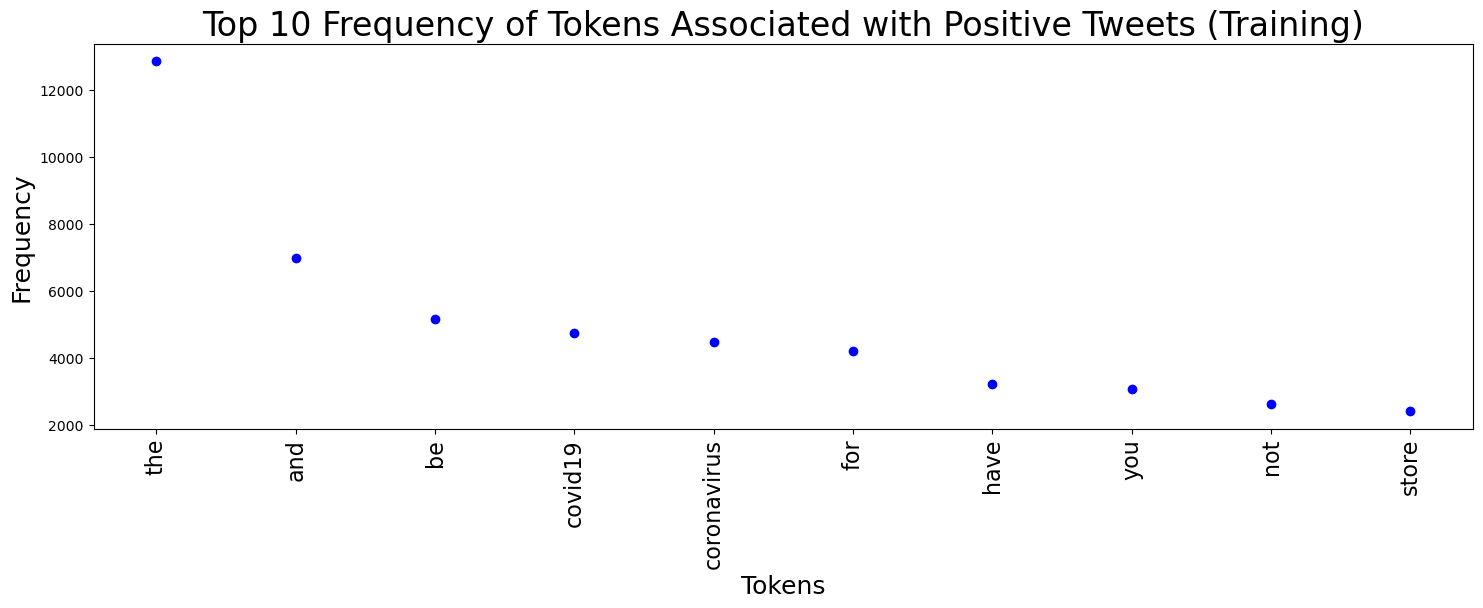

In [35]:
top_n = 10
top_tokens_freq_train = term_freq_df_freq_train.head(top_n)

x = range(0, top_n)
x_ticks_labels_train = top_tokens_freq_train.index

plt.figure(figsize=(17.8, 5))
plt.plot(x, top_tokens_freq_train["Positive freq"], 'bo')
plt.title('Top 10 Frequency of Tokens Associated with Positive Tweets (Training)', fontsize=24)
plt.xticks(x, labels=x_ticks_labels_train, rotation='vertical', fontsize=16)
plt.xlabel("Tokens", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.show()

### Positive tweets from test

In [36]:
positive_tweets_test = test_df[test_df['Sentiment'].str.lower() == 'positive']

corpus_test = st.CorpusFromPandas(positive_tweets_test,
                                  category_col='Sentiment',
                                  text_col='Tweet_texts',
                                  nlp=nlp).build()

In [37]:
term_freq_df_test = corpus_test.get_term_freq_df()
term_freq_df_test['Positive Score'] = corpus_test.get_scaled_f_scores('Positive')
term_freq_df_freq_test = term_freq_df_test.sort_values(by='Positive freq', ascending=False)
term_freq_df_score_test = term_freq_df_test.sort_values(by='Positive Score', ascending=False)

C:\Users\whitl\anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2176: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
C:\Users\whitl\anaconda3\Lib\site-packages\scattertext\termscoring\ScaledFScore.py:303: RuntimeWarning: invalid value encountered in divide
  recall = cat_word_counts * 1. / cat_word_counts.sum()


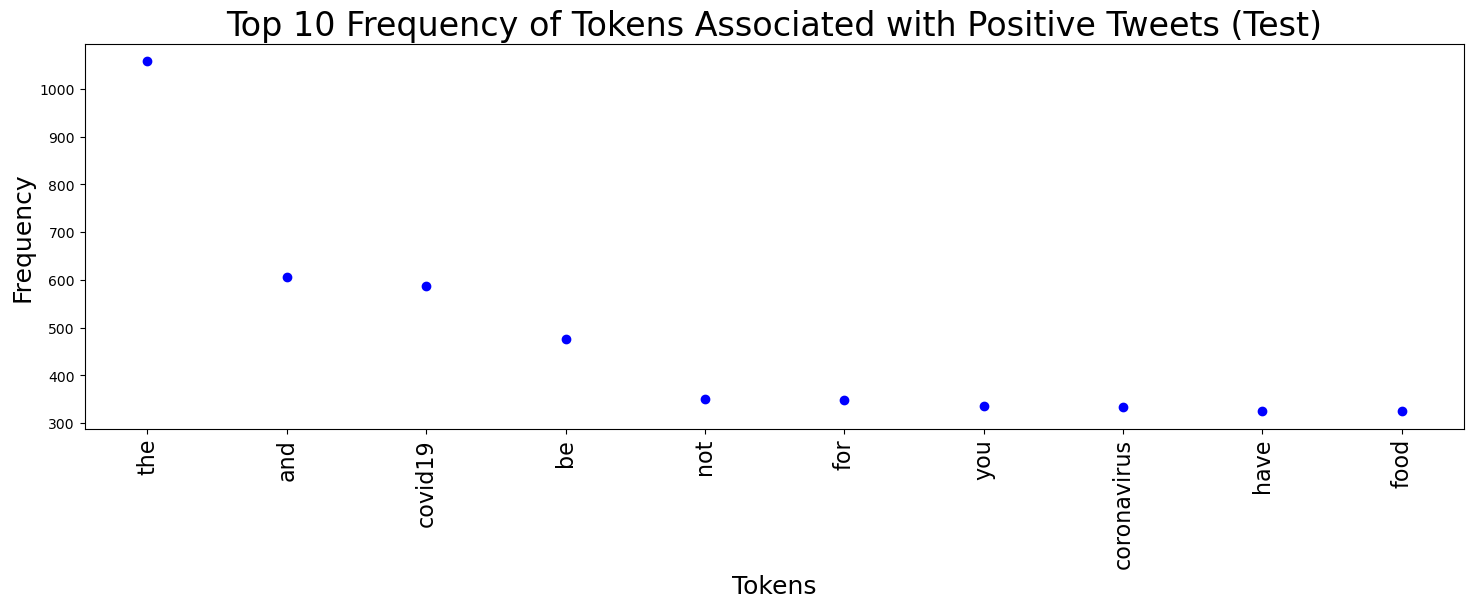

In [38]:
top_tokens_freq_test = term_freq_df_freq_test.head(top_n)

x = range(0, top_n)
x_ticks_labels_test = top_tokens_freq_test.index

plt.figure(figsize=(17.8, 5))
plt.plot(x, top_tokens_freq_test["Positive freq"], 'bo')
plt.title('Top 10 Frequency of Tokens Associated with Positive Tweets (Test)', fontsize=24)
plt.xticks(x, labels=x_ticks_labels_test, rotation='vertical', fontsize=16)
plt.xlabel("Tokens", fontsize=18)
plt.ylabel("Frequency", fontsize=18)
plt.show()

## 10. Visualize the top 10 positive scores of the tokens associated with positive tweets using scattertext.

### Top 10 positive scores of the tokens train

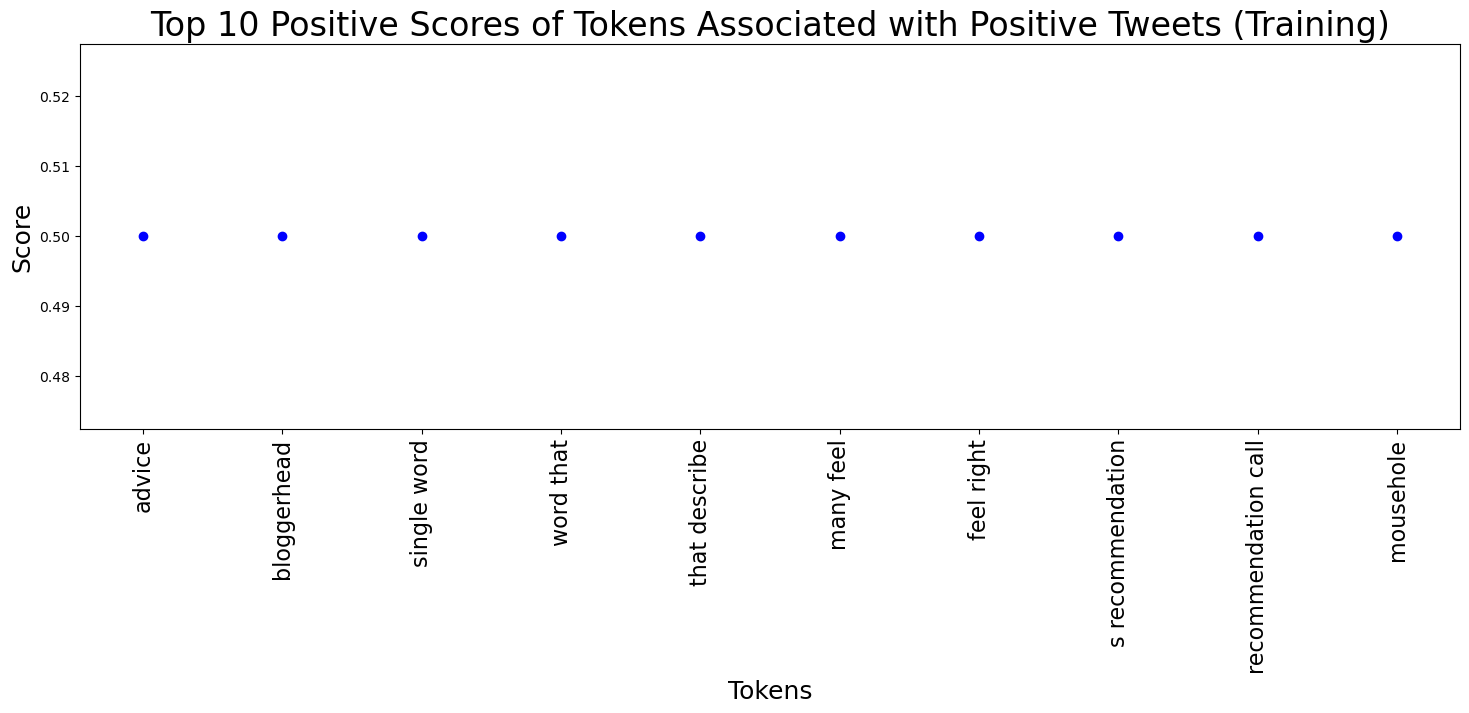

In [39]:
import matplotlib.pyplot as plt

top_tokens_score_train = term_freq_df_score_train.head(top_n)

x = range(0, top_n)
x_ticks_labels_train = top_tokens_score_train.index

plt.figure(figsize=(17.8, 5))
plt.plot(x, top_tokens_score_train["Positive Score"], 'bo') 
plt.title('Top 10 Positive Scores of Tokens Associated with Positive Tweets (Training)', fontsize=24)
plt.xticks(x, labels=x_ticks_labels_train, rotation='vertical', fontsize=16)
plt.xlabel("Tokens", fontsize=18)
plt.ylabel("Score", fontsize=18)
plt.show()

### Top 10 positive scores of the tokens test

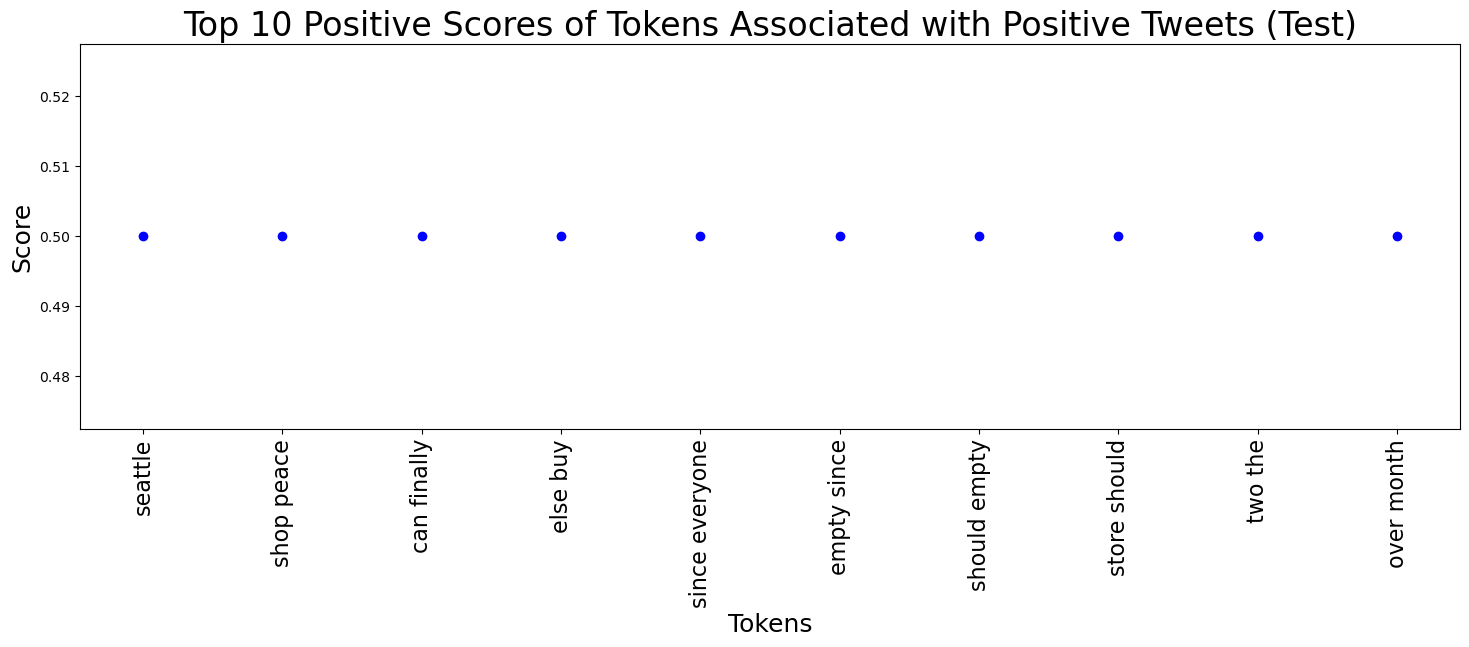

In [40]:
top_tokens_score_test = term_freq_df_score_test.head(top_n)

x = range(0, top_n)
x_ticks_labels_test = top_tokens_score_test.index

plt.figure(figsize=(17.8, 5))
plt.plot(x, top_tokens_score_test["Positive Score"], 'bo')
plt.title('Top 10 Positive Scores of Tokens Associated with Positive Tweets (Test)', fontsize=24)
plt.xticks(x, labels=x_ticks_labels_test, rotation='vertical', fontsize=16)
plt.xlabel("Tokens", fontsize=18)
plt.ylabel("Score", fontsize=18)
plt.show()

## 11. Convert the column of the Tweet_texts to a matrix of token counts using CountVectorizer and unigrams and bigrams.

### Train Matrix

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(train_df['Tweet_texts'].astype(str))

print(f" There are {len(vectorizer.vocabulary_)} Vocabulary (columns in the feature matrix)")
print(f'The first ten mapping of token to index: {list(vectorizer.vocabulary_.items())[:10]}') 

 There are 57852 Vocabulary (columns in the feature matrix)
The first ten mapping of token to index: [('london', 29779), ('menyrbie', 32010), ('philgahan', 38713), ('chrisitv', 8700), ('and', 1958), ('advice', 679), ('talk', 50018), ('your', 57506), ('neighbour', 34557), ('family', 17572)]


In [42]:
matrix = vectorizer.transform(train_df['Tweet_texts'].astype(str))
X = vectorizer.fit_transform(train_df['Tweet_texts'].astype(str))
matrix_size = X.shape

non_zeros_first_row = X[0, ].nnz
total_elements = matrix_size[1]

print(f"The feature matrix has a size of {matrix_size}.")
print(f"There are {matrix_size[0]} tweets and {total_elements} unique unigrams and bigrams combined.")
print(f"For the first row of the feature matrix there are {non_zeros_first_row} non-zero elements.")

The feature matrix has a size of (41157, 57852).
There are 41157 tweets and 57852 unique unigrams and bigrams combined.
For the first row of the feature matrix there are 5 non-zero elements.


In [43]:
vectorizer = CountVectorizer(ngram_range=(1, 2))
matrix = vectorizer.fit_transform(train_df['Tweet_texts'].astype(str))

vectorizer_unigrams = CountVectorizer(ngram_range=(1, 1))
X_unigrams = vectorizer_unigrams.fit_transform(train_df['Tweet_texts'].astype(str))
unique_unigrams = len(vectorizer_unigrams.get_feature_names_out())

vectorizer_bigrams = CountVectorizer(ngram_range=(2, 2))
X_bigrams = vectorizer_bigrams.fit_transform(train_df['Tweet_texts'].astype(str))
unique_bigrams = len(vectorizer_bigrams.get_feature_names_out())

print(f'There are {unique_unigrams} unique unigrams in the data.')
print(f'There are {unique_bigrams} unique bigrams in the data.')

There are 57852 unique unigrams in the data.
There are 427846 unique bigrams in the data.


### Test Matrix

In [44]:
vectorizer = CountVectorizer()
vectorizer.fit(test_df['Tweet_texts'].astype(str))

print(f" There are {len(vectorizer.vocabulary_)} Vocabulary (columns in the feature matrix)")
print(f'The first ten mapping of token to index: {list(vectorizer.vocabulary_.items())[:10]}') 

 There are 11294 Vocabulary (columns in the feature matrix)
The first ten mapping of token to index: [('nyc', 6912), ('trend', 10270), ('new', 6706), ('yorkers', 11232), ('encounter', 3262), ('empty', 3251), ('supermarket', 9682), ('shelf', 8951), ('picture', 7537), ('wegmans', 10891)]


In [45]:
matrix = vectorizer.transform(test_df['Tweet_texts'].astype(str))
X = vectorizer.fit_transform(test_df['Tweet_texts'].astype(str))
matrix_size = X.shape

non_zeros_first_row = X[0, ].nnz
total_elements = matrix_size[1]

print(f"The feature matrix has a size of {matrix_size}.")
print(f"There are {matrix_size[0]} tweets and {total_elements} unique unigrams and bigrams combined.")
print(f"For the first row of the feature matrix there are {non_zeros_first_row} non-zero elements.")

The feature matrix has a size of (3798, 11294).
There are 3798 tweets and 11294 unique unigrams and bigrams combined.
For the first row of the feature matrix there are 19 non-zero elements.


In [46]:
vectorizer = CountVectorizer(ngram_range=(1, 2))
matrix = vectorizer.fit_transform(test_df['Tweet_texts'].astype(str))

vectorizer_unigrams = CountVectorizer(ngram_range=(1, 1))
X_unigrams = vectorizer_unigrams.fit_transform(test_df['Tweet_texts'].astype(str))
unique_unigrams = len(vectorizer_unigrams.get_feature_names_out())

vectorizer_bigrams = CountVectorizer(ngram_range=(2, 2))
X_bigrams = vectorizer_bigrams.fit_transform(test_df['Tweet_texts'].astype(str))
unique_bigrams = len(vectorizer_bigrams.get_feature_names_out())

print(f'There are {unique_unigrams} unique unigrams in the data.')
print(f'There are {unique_bigrams} unique bigrams in the data.')

There are 11294 unique unigrams in the data.
There are 60350 unique bigrams in the data.


## 12. Perform the TF-IDF analysis on the column of the Tweet_texts using Tfidfvectorizer.

### TD_IDF analysis for train

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True, sublinear_tf=False)
tf_idf_matrix = tfidf_vectorizer.fit_transform(train_df['Tweet_texts'].astype(str))

print(f'The size of the tf_idf matrix for the texts = {tf_idf_matrix.get_shape()}')
print(f'The sparse tf_idf matrix is as follows:')
print(tf_idf_matrix)

The size of the tf_idf matrix for the texts = (41157, 57852)
The sparse tf_idf matrix is as follows:
  (0, 1958)	0.19073090442007778
  (0, 8700)	0.5289619574768474
  (0, 38713)	0.5647713933505886
  (0, 32010)	0.5647713933505886
  (0, 29779)	0.21421371605719092
  (1, 36855)	0.12641469389826276
  (1, 37176)	0.11737505148588323
  (1, 35533)	0.07177982689634582
  (1, 6774)	0.09361214919658613
  (1, 31736)	0.21606702116406565
  (1, 42105)	0.18114040180812496
  (1, 49441)	0.10996655296331044
  (1, 546)	0.2193164196474045
  (1, 39577)	0.2818453428669955
  (1, 335)	0.18032279070478877
  (1, 46062)	0.10030494255301912
  (1, 36585)	0.09577369721878978
  (1, 45508)	0.15495695614404073
  (1, 8393)	0.2105553976535326
  (1, 16283)	0.20163556068134852
  (1, 44770)	0.22507595866130306
  (1, 34560)	0.2818453428669955
  (1, 56565)	0.07810696545319094
  (1, 29387)	0.1484720543296489
  (1, 10247)	0.15433964504068765
  :	:
  (41156, 2162)	0.15424005170516572
  (41156, 1573)	0.20312379829723154
  (41156, 33

### TD_IDF analysis for test

In [48]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True, sublinear_tf=False)
tf_idf_matrix = tfidf_vectorizer.fit_transform(test_df['Tweet_texts'].astype(str))

print(f'The size of the tf_idf matrix for the texts = {tf_idf_matrix.get_shape()}')
print(f'The sparse tf_idf matrix is as follows:')
print(tf_idf_matrix)

The size of the tf_idf matrix for the texts = (3798, 11294)
The sparse tf_idf matrix is as follows:
  (0, 9506)	0.09127420608589282
  (0, 9008)	0.19719858156410777
  (0, 2194)	0.3062621151092572
  (0, 6150)	0.3062621151092572
  (0, 3819)	0.3062621151092572
  (0, 4299)	0.26138454930593774
  (0, 7033)	0.11068408931230433
  (0, 9239)	0.28143159330326456
  (0, 1236)	0.2256143801624128
  (0, 10891)	0.26690666917341993
  (0, 7537)	0.23177054969127928
  (0, 8951)	0.14165173099466874
  (0, 9682)	0.10466457176142681
  (0, 3251)	0.15088790983272404
  (0, 3262)	0.28143159330326456
  (0, 11232)	0.28143159330326456
  (0, 6706)	0.1383692697897081
  (0, 10270)	0.23920878780218618
  (0, 6912)	0.2172456255614346
  (1, 7820)	0.1342026021470222
  (1, 3021)	0.24098333316065068
  (1, 840)	0.08362688099750291
  (1, 1976)	0.23749863025499285
  (1, 2177)	0.08618283198374459
  (1, 4745)	0.15666761597700818
  :	:
  (3796, 6601)	0.0840827589586772
  (3796, 9682)	0.09772471155009822
  (3797, 3273)	0.2863701867216

## 13. Find the cosine similarity in Tweet_texts between the 200th and 20,000th tweets.

### Cosine similarity for train

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import spatial

tfidf_vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True, sublinear_tf=False)
observations = train_df.loc[[199, 19999], 'Tweet_texts'].dropna()
tf_idf_matrix = tfidf_vectorizer.fit_transform(observations)
    
print(f'The size of the tf_idf matrix for the texts = {tf_idf_matrix.shape}')
    
cos_sim = 1 - spatial.distance.cosine(tf_idf_matrix[0, :].toarray().ravel(), tf_idf_matrix[1, :].toarray().ravel())
print(f"The cosine similarity between {observations.iloc[0]} and {observations.iloc[1]} = {cos_sim}")

The size of the tf_idf matrix for the texts = (2, 63)
The cosine similarity between Cambridge our retail store will closed through the end March be do this keep our staff and customer safe during the covid19 crisis will continue fulfill and ship out order place online Pickups will not available until return regular hour and nan barriismail httweet do not you understand that presently fight with Covid more important than oil price do not know why you people be irresponsible you just oppose from BJP have you see how manage the fight agai = 0.07117715916667333


### Cosine similarity for test

In [50]:
num_rows_test_df = len(test_df)
print("Number of rows in test_df:", num_rows_test_df)

Number of rows in test_df: 3798


In [51]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True, smooth_idf=True, sublinear_tf=False)
observations = test_df.loc[[199, 3787], 'Tweet_texts'].dropna()
tf_idf_matrix = tfidf_vectorizer.fit_transform(observations)
    
print(f'The size of the tf_idf matrix for the texts = {tf_idf_matrix.shape}')
    
cos_sim = 1 - spatial.distance.cosine(tf_idf_matrix[0, :].toarray().ravel(), tf_idf_matrix[1, :].toarray().ravel())
print(f"The cosine similarity between {observations.iloc[0]} and {observations.iloc[1]} = {cos_sim}")

The size of the tf_idf matrix for the texts = (2, 57)
The cosine similarity between nan AEWrestling Luca from Italy and big fan your product the district live the most cover coronavirus here Italy our government have forbid leave our house except for go the grocery store the pharmacy and Manchester England its funny see all these people fight and panic over food the same people who discriminate over muslim refugee flee their war tear country the AUDACITY wash your Ass Karen Itscoronatime CoronaVirusOutbreak CoronaVirus = 0.14260058373242457


## 14. Find the corpus vector equal to the average of all the document vectors, where each document corresponds to a tweet or a row in this dataset.

In [52]:
nlp = spacy.load("en_core_web_lg")

cumulative_vector = np.zeros((nlp.vocab.vectors_length,), dtype=np.float32)
valid_vector_count = 0

for index, row in train_df.iterrows():
    text = row['Tweet_texts']
    if not isinstance(text, str) or text.strip() == "":
        continue
    doc = nlp(text)
    if doc.has_vector:
        cumulative_vector += doc.vector
        valid_vector_count += 1

if valid_vector_count == 0:
    raise ValueError("No valid vectors found")
    
average_vector = cumulative_vector / valid_vector_count
print(average_vector)

[-0.56436104  0.6035637  -1.7982346   0.8085901   2.2208393   0.2848715
  0.53133756  2.8575456  -1.3050445   0.41792428  4.0616207   1.215807
 -3.8404415   1.2470658   0.40334877  0.7776016   1.8680224  -0.8841514
 -1.474874   -1.4605182   0.46785197 -0.20996651 -0.86422706 -0.76277804
 -0.5400358  -0.7623835  -2.203894   -0.69195354 -0.5609981   0.6990045
  2.020213   -0.10256501 -1.1525437  -1.4821666  -0.39015186 -0.9636157
  0.02463616  1.4818014   1.3257675   1.0037919  -0.18822856  0.79055065
  0.57281196  0.5333419  -0.9991366   1.111261    1.3549608  -2.6705508
 -0.06777781  0.85395056 -0.18112509  1.619774    0.0837528  -3.856811
 -1.1364819   0.76517177 -0.51140004  0.961074    0.6810775   0.67590183
  1.3001841  -0.30442166 -0.89583427 -1.2555413   1.9808165   1.1678362
 -2.6703107  -1.5749387   0.59187335  2.3059747  -0.43426916  0.14015955
 -1.098295   -0.02702677 -0.15903564  1.7118443  -1.1782885   0.2290133
 -1.2604905  -0.33902964 -3.0788927   0.6307859   1.3531752   

In [53]:
nlp = spacy.load("en_core_web_lg")

cumulative_vector = np.zeros((nlp.vocab.vectors_length,), dtype=np.float32)
valid_vector_count = 0

for index, row in test_df.iterrows():
    text = row['Tweet_texts']
    if not isinstance(text, str) or text.strip() == "":
        continue
    doc = nlp(text)
    if doc.has_vector:
        cumulative_vector += doc.vector
        valid_vector_count += 1

if valid_vector_count == 0:
    raise ValueError("No valid vectors found")
    
average_vector = cumulative_vector / valid_vector_count
print(average_vector)

[-5.66017985e-01  6.82538807e-01 -2.07647586e+00  7.67627120e-01
  2.01180315e+00  3.61845881e-01  5.44774473e-01  2.97677898e+00
 -1.50282609e+00  5.98313153e-01  4.17536783e+00  1.23547888e+00
 -3.84922910e+00  1.37371182e+00  5.47851443e-01  5.09742856e-01
  1.93014729e+00 -1.22210610e+00 -1.55585408e+00 -1.66821313e+00
  5.49215317e-01 -2.14523971e-01 -9.13060308e-01 -9.65717316e-01
 -7.12232649e-01 -6.56169593e-01 -2.27299166e+00 -7.60656178e-01
 -6.59938872e-01  7.95321643e-01  2.13150239e+00 -3.32452595e-01
 -1.24339366e+00 -1.61890578e+00 -3.20635200e-01 -9.36507821e-01
  7.05830753e-02  1.50481224e+00  1.58161378e+00  1.22096527e+00
 -2.53525198e-01  8.77796352e-01  7.41716564e-01  4.36286956e-01
 -9.20517981e-01  1.17322779e+00  1.45623314e+00 -2.98633194e+00
 -2.11185366e-01  9.45224524e-01 -1.42111018e-01  1.54509485e+00
  2.26822093e-01 -3.93751740e+00 -1.34279847e+00  6.88102305e-01
 -4.55605894e-01  1.15005898e+00  8.07663620e-01  8.43711376e-01
  1.46978390e+00 -3.57239

# For steps 15 to 20, we want to forecast Sentiment using Tweet_texts.


## 15. Build the first model based on the training dataset using the random forests and pipeline.

In [54]:
num_rows_train_df = train_df.shape[0]
print("Number of rows in the reduced train_df:", num_rows_train_df)

Number of rows in the reduced train_df: 41157


We will reduce the size of train_df, you can adjust the frac or skp this cell to run different sizes.

In [55]:
train_df_reduced = train_df.sample(frac=0.1, random_state=1)

num_rows_reduced_train_df = train_df_reduced.shape[0]
print("Number of rows in the reduced train_df:", num_rows_reduced_train_df)

Number of rows in the reduced train_df: 4116


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

In [57]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(train_df_reduced['Tweet_texts'], 
                                                    train_df_reduced['Sentiment'], 
                                                    test_size=0.3, 
                                                    random_state=1)

In [59]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

## 16. Check the first model on the test dataset.

In [60]:
predictions = pipeline.predict(X_test)

print("Classification Report:\n", classification_report(y_test, predictions))
print("Accuracy Score:", accuracy_score(y_test, predictions))

Classification Report:
                     precision    recall  f1-score   support

Extremely Negative       0.55      0.10      0.17       154
Extremely Positive       0.51      0.20      0.28       208
          Negative       0.36      0.47      0.41       298
           Neutral       0.44      0.57      0.49       217
          Positive       0.39      0.50      0.44       358

          accuracy                           0.40      1235
         macro avg       0.45      0.37      0.36      1235
      weighted avg       0.43      0.40      0.38      1235

Accuracy Score: 0.40242914979757083


 ### Is it a good model based on the selected evaluation metrics?

No, the model has an accuracy score under 40%. Also even the highest F1 score is still under .5, indicating a less than satisfactory balance between precision and recall.

## 17. Create the second model using pipeline, grid search CV for the hyperparameters for the estimators.

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train = train_df_reduced['Tweet_texts']
y_train = train_df_reduced['Sentiment']
X_test = test_df['Tweet_texts']
y_test = test_df['Sentiment']

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier(random_state=42))
])

parameters = {
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'clf__n_estimators': [50, 100, 200],
    'clf__max_features': ['sqrt', 'log2'],
    'clf__max_depth': [None, 10, 20, 30],
    'clf__criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
predictions = grid_search.predict(X_test)

print('Classification Report:')
print(classification_report(y_test, predictions))

print('Accuracy Score:')
print(accuracy_score(y_test, predictions))

print("Best parameters found:")
print(grid_search.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Classification Report:
                    precision    recall  f1-score   support

Extremely Negative       0.56      0.16      0.24       592
Extremely Positive       0.64      0.25      0.36       599
          Negative       0.38      0.44      0.41      1041
           Neutral       0.45      0.55      0.50       619
          Positive       0.35      0.54      0.43       947

          accuracy                           0.41      3798
         macro avg       0.48      0.39      0.39      3798
      weighted avg       0.46      0.41      0.40      3798

Accuracy Score:
0.41047919957872564
Best parameters found:
{'clf__criterion': 'entropy', 'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__n_estimators': 200, 'tfidf__max_df': 0.25, 'tfidf__ngram_range': (1, 1)}


## 18. Tune the second model and perform model diagnostics on the test dataset. 

In [62]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.25, ngram_range=(1, 1))
classifier = RandomForestClassifier(
    criterion='entropy',
    max_depth=None,
    max_features='sqrt',
    n_estimators=200,
    random_state=42
)

pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('clf', classifier)
])

X_train = train_df_reduced['Tweet_texts']
y_train = train_df_reduced['Sentiment']
X_test = test_df['Tweet_texts']
y_test = test_df['Sentiment']

pipeline.fit(X_train, y_train)

predictions = pipeline.predict(X_test)


print('Classification Report:')
print(classification_report(y_test, predictions))

print('Accuracy Score:')
print(accuracy_score(y_test, predictions))

Classification Report:
                    precision    recall  f1-score   support

Extremely Negative       0.56      0.16      0.24       592
Extremely Positive       0.64      0.25      0.36       599
          Negative       0.38      0.44      0.41      1041
           Neutral       0.45      0.55      0.50       619
          Positive       0.35      0.54      0.43       947

          accuracy                           0.41      3798
         macro avg       0.48      0.39      0.39      3798
      weighted avg       0.46      0.41      0.40      3798

Accuracy Score:
0.41047919957872564


### Is it a good model?

This is not a good model. We have a low accuracy score, only attaining a hit rate of 41%. Also we have a poor F1 scores so there isn't a good balance between precision and recall. Our lowest F1 score was only .24.

## 19. Build the third model using pipeline, grid search CV, hyperparameter for Logistic Regression, Support Vector Machine, and Random Forest.

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train = train_df_reduced['Tweet_texts']
y_train = train_df_reduced['Sentiment']
X_test = test_df['Tweet_texts']
y_test = test_df['Sentiment']

pipelines = {
    'lr': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', LogisticRegression(solver='liblinear'))
    ]),
    'svm': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', SVC())
    ]),
    'rf': Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', RandomForestClassifier())
    ])
}

parameters = {
    'lr': {
        'tfidf__max_df': (0.25, 0.5, 0.75),
        'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'clf__C': [0.1, 1, 10],
    },
    'svm': {
        'tfidf__max_df': (0.25, 0.5, 0.75),
        'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'clf__C': [0.1, 1, 10],
        'clf__gamma': [0.1, 1, 10]
    },
    'rf': {
        'tfidf__max_df': (0.25, 0.5, 0.75),
        'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'clf__n_estimators': [50, 100, 200],
        'clf__max_features': ['sqrt', 'log2'],
        'clf__max_depth': [None, 10, 20, 30],
        'clf__criterion': ['gini', 'entropy']
    }
}


best_estimators = {}

for classifier in pipelines.keys():
    grid_search = GridSearchCV(pipelines[classifier], parameters[classifier], cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    
    best_estimators[classifier] = grid_search.best_estimator_
    print(f"Classifier: {classifier}")
    print("Best parameters found:")
    print(grid_search.best_params_)
    print("Best score:")
    print(grid_search.best_score_)
    print("-"*30)

for classifier in best_estimators.keys():
    predictions = best_estimators[classifier].predict(X_test)

    print(f"Classifier: {classifier}")
    print('Classification Report:')
    print(classification_report(y_test, predictions))
    print('Accuracy Score:')
    print(accuracy_score(y_test, predictions))
    print("-"*30)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Classifier: lr
Best parameters found:
{'clf__C': 10, 'tfidf__max_df': 0.75, 'tfidf__ngram_range': (1, 1)}
Best score:
0.4258986185987802
------------------------------
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Classifier: svm
Best parameters found:
{'clf__C': 10, 'clf__gamma': 0.1, 'tfidf__max_df': 0.75, 'tfidf__ngram_range': (1, 1)}
Best score:
0.4382925951704043
------------------------------
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Classifier: rf
Best parameters found:
{'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__n_estimators': 200, 'tfidf__max_df': 0.25, 'tfidf__ngram_range': (1, 1)}
Best score:
0.4084046054571836
------------------------------
Classifier: lr
Classification Report:
                    precision    recall  f1-score   support

Extremely Negative       0.52      0.41      0.46       592
Extremely Positive       0.51      0.4

## 20. Tune the third model and perform model diagnostics on the test dataset.

In [64]:
X_train = train_df_reduced['Tweet_texts']
y_train = train_df_reduced['Sentiment']
X_test = test_df['Tweet_texts']
y_test = test_df['Sentiment']

best_estimators = {
    'lr': Pipeline([
        ('tfidf', TfidfVectorizer(max_df=0.75, ngram_range=(1, 1))),
        ('clf', LogisticRegression(solver='liblinear', C=10))
    ]),
    'svm': Pipeline([
        ('tfidf', TfidfVectorizer(max_df=0.75, ngram_range=(1, 1))),
        ('clf', SVC(C=10, gamma=0.1))
    ]),
    'rf': Pipeline([
        ('tfidf', TfidfVectorizer(max_df=0.25, ngram_range=(1, 1))),
        ('clf', RandomForestClassifier(criterion='gini', max_features='sqrt', n_estimators=200))
    ])
}

for classifier in best_estimators.keys():
    print(f"\nTraining and evaluating the {classifier} model...")
    best_estimators[classifier].fit(X_train, y_train)
    predictions = best_estimators[classifier].predict(X_test)

    print(f"Classifier: {classifier}")
    print('Classification Report:')
    print(classification_report(y_test, predictions))
    print('Accuracy Score:')
    print(accuracy_score(y_test, predictions))
    print("-"*30)


Training and evaluating the lr model...
Classifier: lr
Classification Report:
                    precision    recall  f1-score   support

Extremely Negative       0.52      0.41      0.46       592
Extremely Positive       0.51      0.47      0.49       599
          Negative       0.40      0.37      0.39      1041
           Neutral       0.46      0.45      0.45       619
          Positive       0.34      0.44      0.39       947

          accuracy                           0.42      3798
         macro avg       0.45      0.43      0.43      3798
      weighted avg       0.43      0.42      0.42      3798

Accuracy Score:
0.42206424433912587
------------------------------

Training and evaluating the svm model...
Classifier: svm
Classification Report:
                    precision    recall  f1-score   support

Extremely Negative       0.49      0.42      0.45       592
Extremely Positive       0.55      0.47      0.51       599
          Negative       0.39      0.40      0.39

### Is it a good model?

This not a good model, we see that none of the accuracies are very good. The peak of any of the F1 scores is only .51.

## 21. Generate the first topic model by setting five topics using LDA method and CountVectorizer.

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.90, min_df=5, stop_words='english')
document_word_matrix_tf = tf_vectorizer.fit_transform(train_df['Tweet_texts'])

Specify number of topics

In [66]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components= 5 ,random_state= 101)
lda.fit(document_word_matrix_tf)

LatentDirichletAllocation(n_components=5, random_state=101)

## 22. Plot the top 15 words for each topic for the model above.

In [67]:
n_top_words = 15 
for index, topic in enumerate(lda.components_):
    print(f'THE TOP {n_top_words} WORDS FOR TOPIC #{index}')
    print([tf_vectorizer.get_feature_names_out()[j] for j in topic.argsort()[-n_top_words:]])
    print('#'*150)

THE TOP 15 WORDS FOR TOPIC #0
['crisis', 'business', 'low', 'global', 'covid', 'impact', 'market', 'demand', 'pandemic', 'nan', 'oil', 'coronavirus', 'consumer', 'covid19', 'price']
######################################################################################################################################################
THE TOP 15 WORDS FOR TOPIC #1
['like', 'make', 'worker', 'usa', 'mask', 'toilet', 'paper', 'toiletpaper', 'nan', 'sanitizer', 'hand', 'covid19', 'grocery', 'store', 'coronavirus']
######################################################################################################################################################
THE TOP 15 WORDS FOR TOPIC #2
['make', 'free', 'demand', 'pandemic', 'nan', 'covid', 'york', 'food', 'help', 'amp', 'consumer', 'price', 'new', 'coronavirus', 'covid19']
######################################################################################################################################################
THE TOP 15 WORD

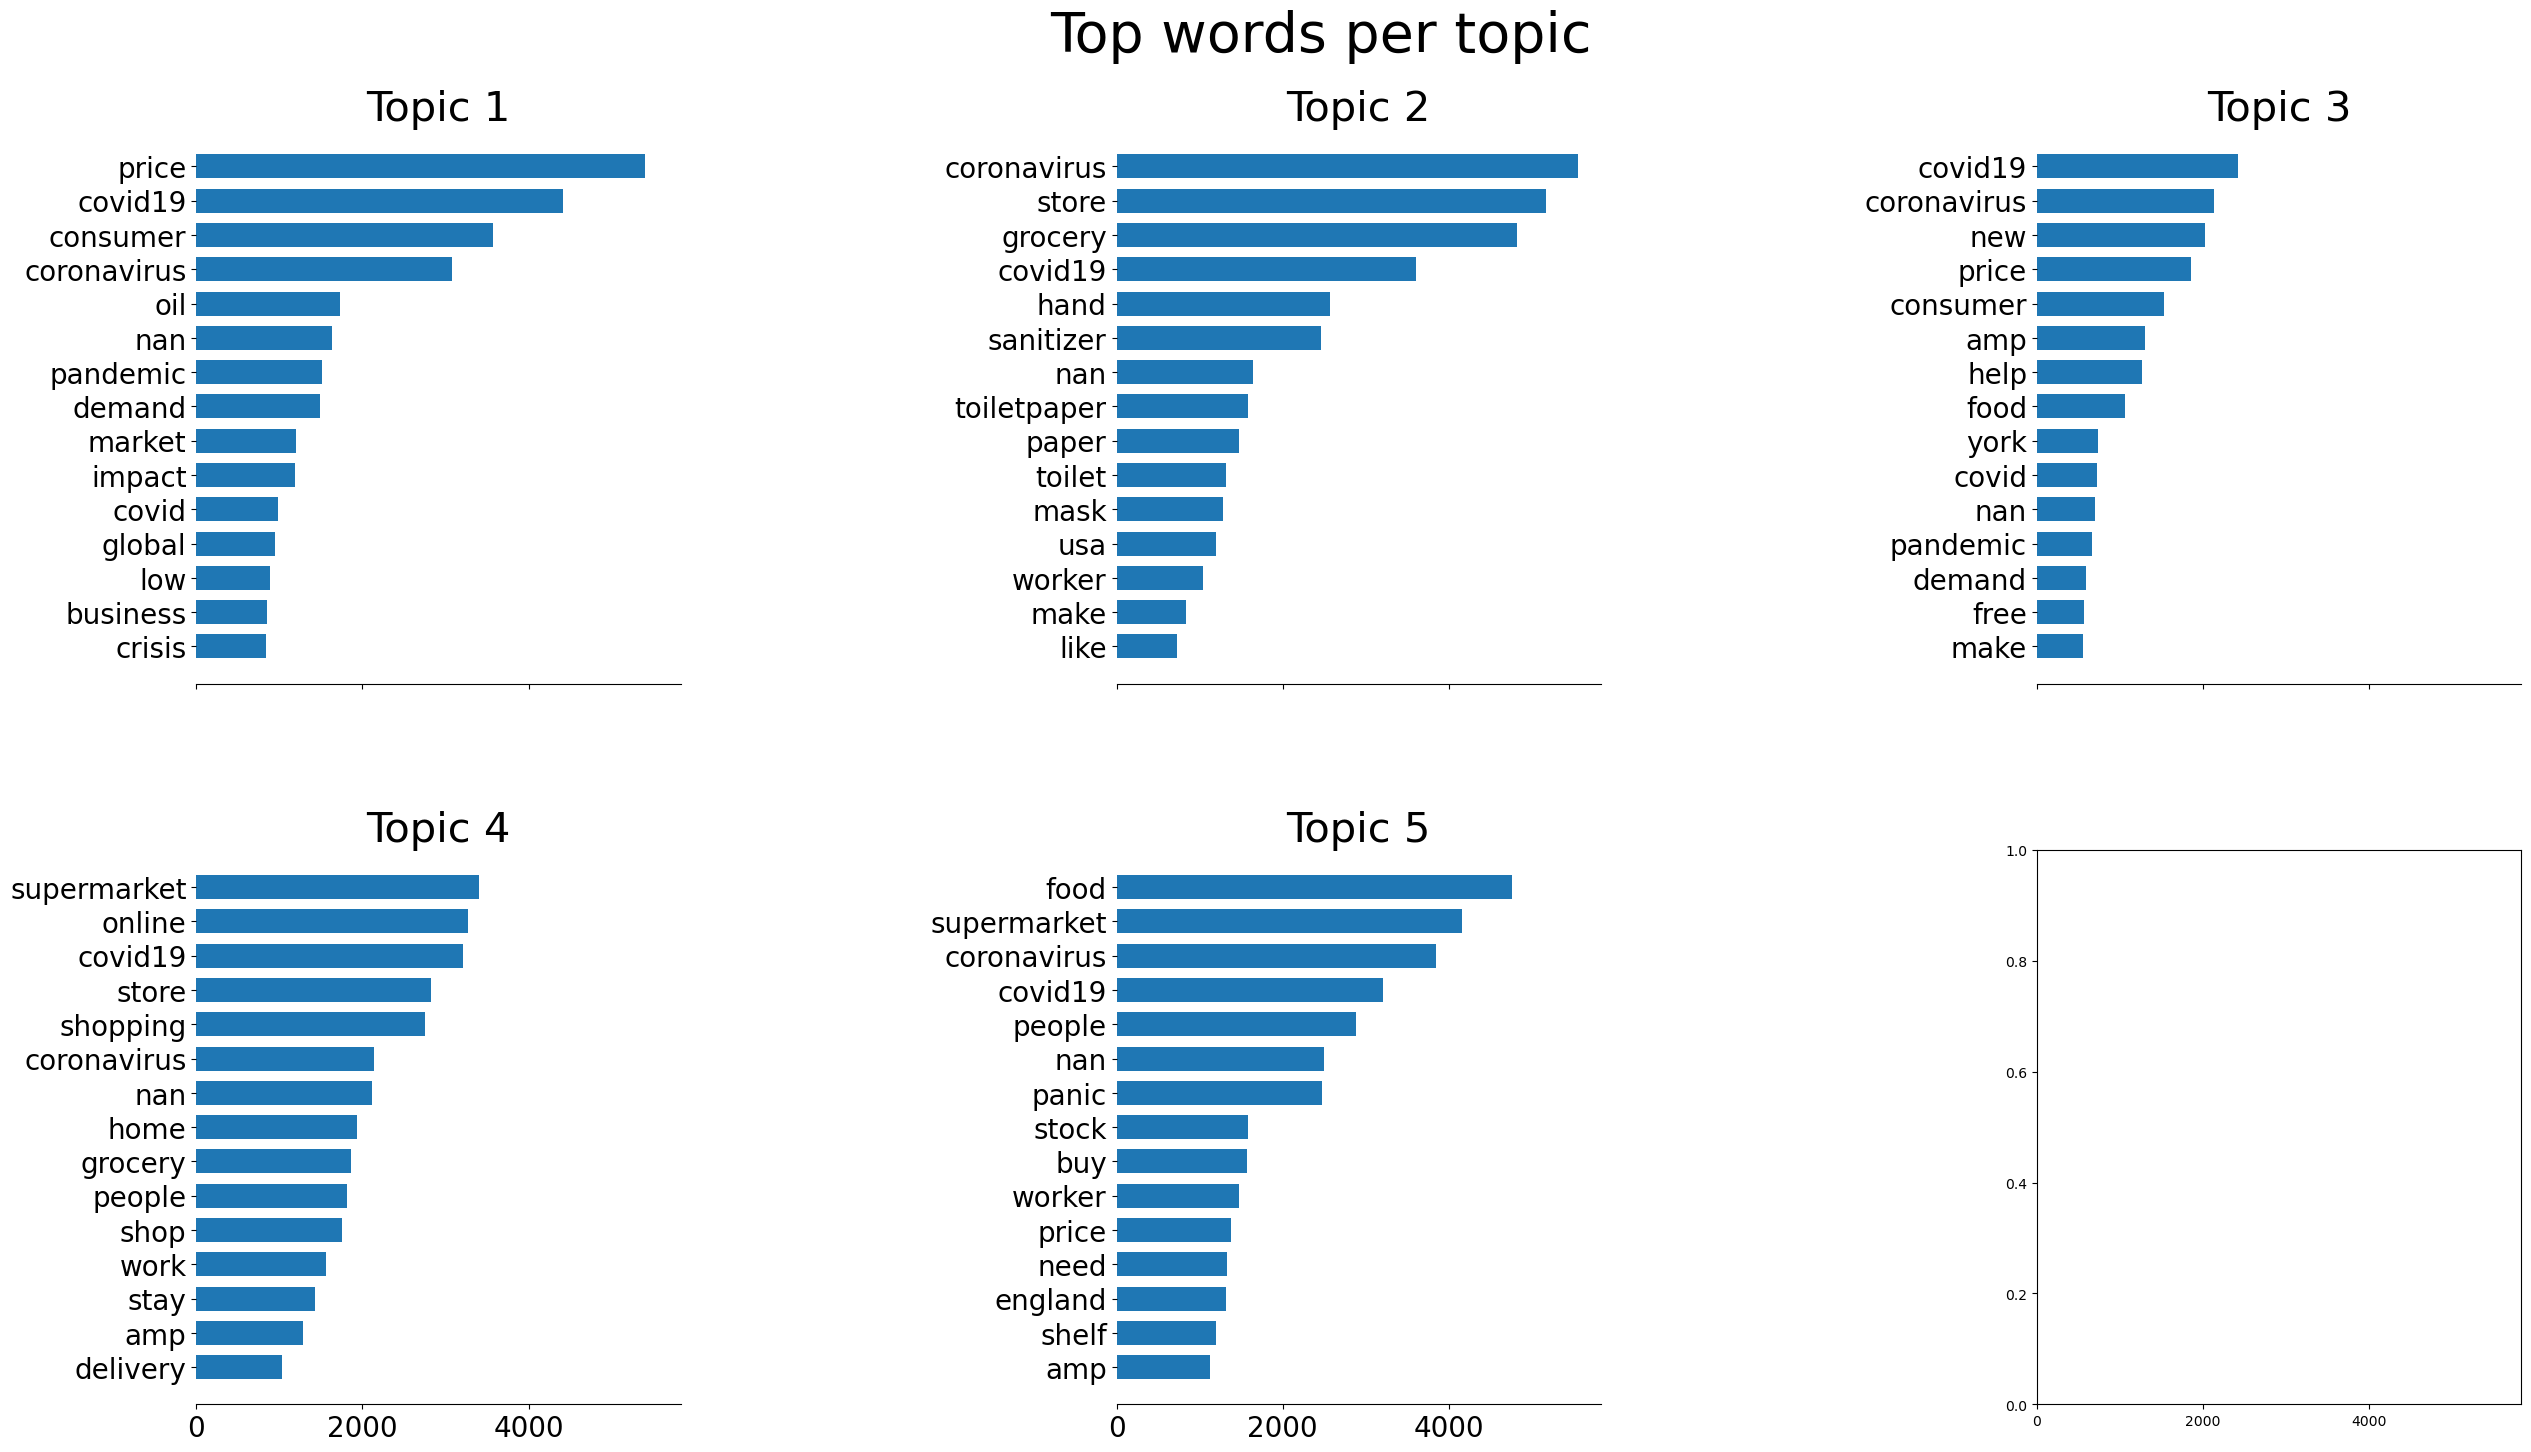

In [68]:
import matplotlib.pyplot as plt

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 3, figsize=(30, 15), sharex=True)
    axes = axes.flatten()

    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}', fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

feature_names = tf_vectorizer.get_feature_names_out()
n_top_words = 15
plot_top_words(lda, feature_names, n_top_words, 'Top words per topic')

## 23. Generate the second topic model by setting five topics using LDA method and TfidfVectorizer.

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

tfidf_vectorizer = TfidfVectorizer(stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z0-9]{2,}\b', 
                                max_df = 0.9, 
                                min_df = 5)
document_word_matrix_tf_idf = tfidf_vectorizer.fit_transform(train_df['Tweet_texts'])

In [70]:
lda_tf_idf = LatentDirichletAllocation(n_components= 5, random_state= 101)
lda_tf_idf.fit(document_word_matrix_tf_idf)

LatentDirichletAllocation(n_components=5, random_state=101)

## 24. Plot the top 15 words for each topic for the second model above.

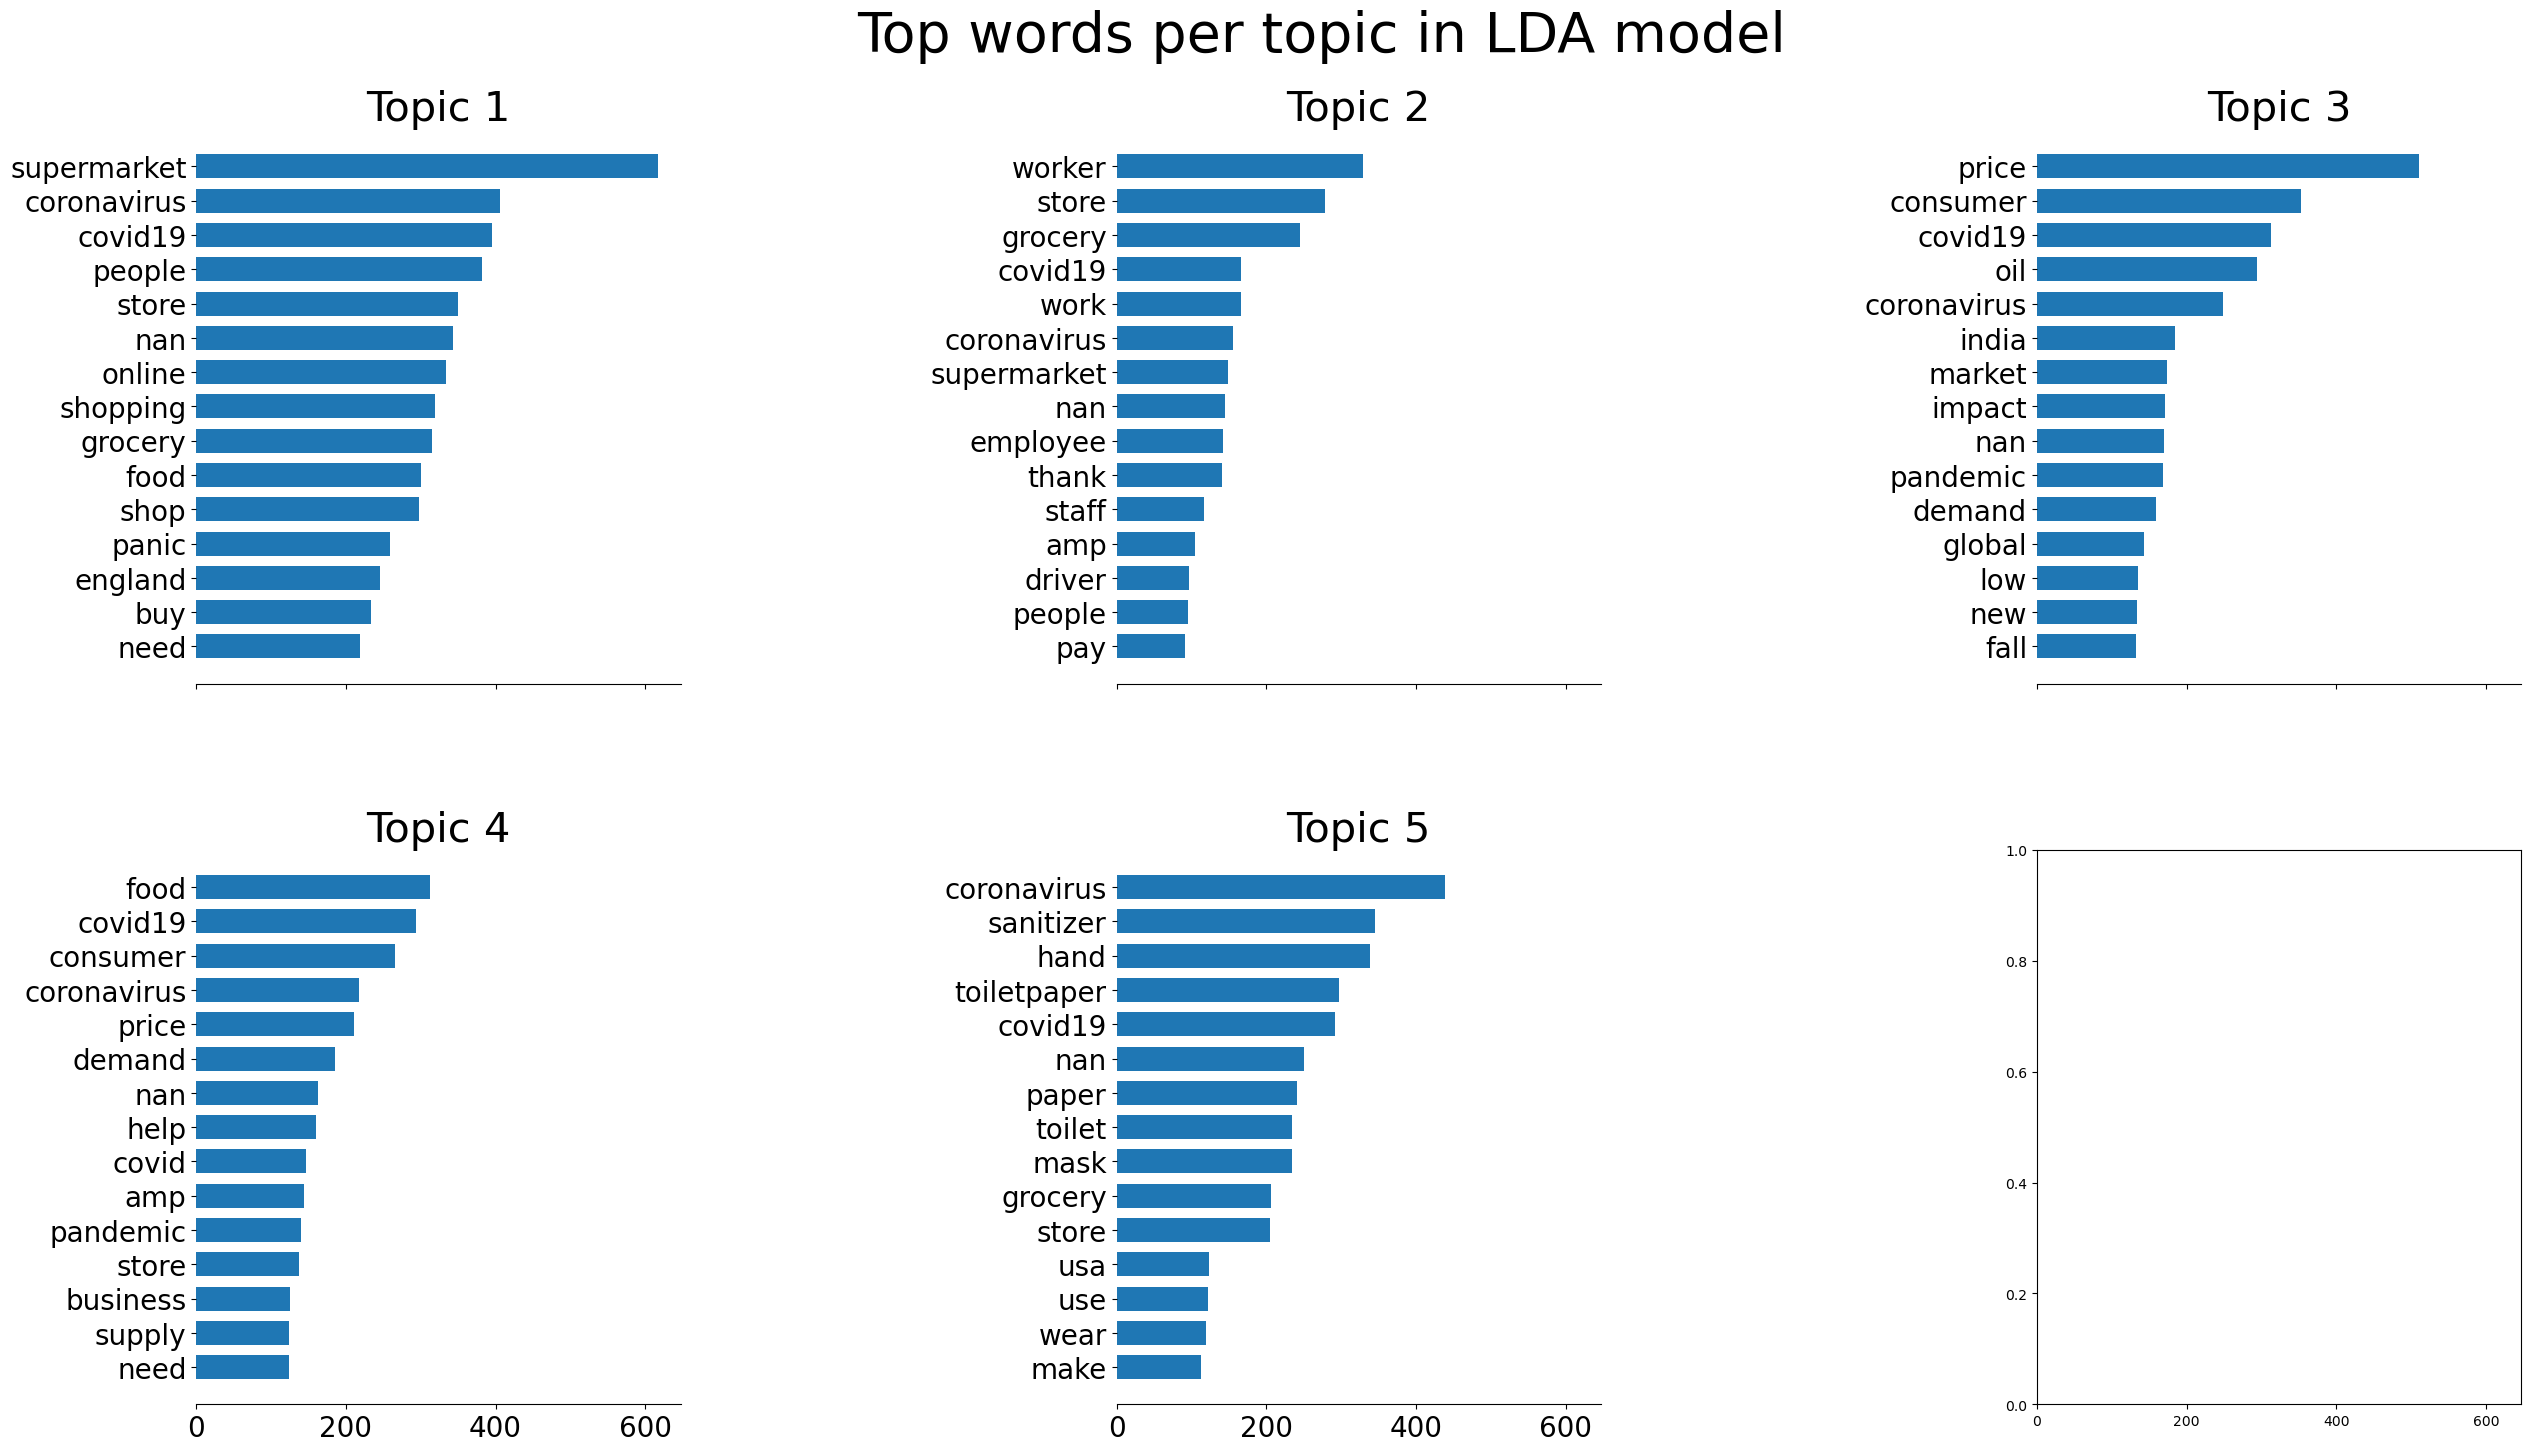

In [71]:
import matplotlib.pyplot as plt

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 3, figsize=(30, 15), sharex=True)
    axes = axes.flatten()

    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}', fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

feature_names = tfidf_vectorizer.get_feature_names_out()

n_top_words = 15

plot_top_words(lda_tf_idf, feature_names, n_top_words, 'Top words per topic in LDA model')

## 25. Visualize the second topic model using the dimension reduction method.

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model = lda_tf_idf, dtm = document_word_matrix_tf_idf, vectorizer = tfidf_vectorizer)